## Данные не парсил

## Часть 2. EDA (30 баллов)

1. Выведите первые 5 строк датасета. (0.25). Сколько в нём строк и столбцов (0.25)?
2. Есть ли в датасете пропуски? (0.5)
3. Проверьте типы данных. Если это необходимо, приведите к типам int и float те столбцы, с которыми понадобится работать как с числами. (1).
4. Выведите описательные статистики переменных. Ответьте на следующие вопросы:

* Какая медианная цена книги в вашем датасете? (1)  
* Какое возрастное ограничение встречается чаще всего? (1)  
* Какое среднее число отзывов в книге? (1)  
* Сколько книг имеют оценку ниже 4.25? (1)  
* В каком году было написано больше всего книг из датасета? (1)  

5. Если вы работаете с готовым датасетом, то попробуйте "достать" из столбца pages количество страниц. Если у вас не получилось, то далее при определении числа страниц пользуйтесь стольцов pages_count. Если вы парсили датасет сами, то вы получаете балл за этот пункт автоматически (1.5)

6. Создайте новое поле is_popular. Значение равно 1, если рейтинг книги не менее 4.6 и при этом у нее не менее 5 отзывов, и 0 в остальных случаях. (1)

7. Как отличается среднее число страниц среди популярных и непопулярных книг? (2)

8. Выведите топ-10 книг по числу отзывов. (2).

9. Найдите среднюю длину отзыва (в символах). (2)

10. Постройте таблицу корреляций числовых переменных. (1) Прокомментируйте результаты. (1)

11. Постройте диаграмму рассеяния (scatterplot) количества страниц и количества отзывов. Не забудьте подписать график и оси. (1) Прокомментируйте полученные результаты. (1)

12. Постройте линейный график: по оси Х год, по оси Y количество книг. (1) Прокомментируйте. (1)

12. Постройте еще любые два графика по вашему усмотрению. (2) Прокомментируйте полученные результаты. (1.5)

13. Постройте таблицу с авторами книг с именем автора, количество книг в датасете, средней оценкой книг, средним количеством отзывов. (2).

14. Что еще интересного можно увидеть в этом датасете? Просмотрите на данные и ответьте на какие-нибудь вопросы, на которые не ответили в предыдущим пункте. Мы никак не ограничиваем вашу фантазию! (3).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import ast

In [2]:
df = pd.read_csv("litres_programming_data.csv")
df = df.drop(df.columns[0], axis=1)

In [3]:
r, c = df.shape
print(f"строк: {r}, столбцов: {c}")

строк: 965, столбцов: 12


In [4]:
df.head()

,name,author,link,rating,rating_count,review_count,price,pages,pages_count,text_of_reviews,age,year
0,Нейросети начало,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,4.9,433,37,690.0,102 стр. 4 иллюстрации,102,['Книга отличная. Давно хотела понять как все ...,12+,2023
1,Python 3 и PyQt 6. Разработка приложений,Николай Прохоренок,https://www.litres.ru/book/vladimir-dronov/pyt...,4.7,3,1,549.0,831 стр.,831,"['Большая книга, посвященная реализации графич...",0+,2023
2,Система взаимодействия. Коммуникации в бизнес-...,Е. Ю. Хрусталева,https://www.litres.ru/book/e-u-hrustaleva/sist...,4.3,10,3,250.0,130 стр.,130,['Полезная книга. Есть примеры оповещения поль...,12+,2019
3,Постановка задачи обеспечения автоматизации по...,О. В. Тиханычев,https://www.litres.ru/book/o-v-tihanychev/post...,0.0,0,0,168.0,10 стр.,10,[],0+,2021
4,Разработка и реализация портальных решений. Пр...,С. В. Маркова,https://www.litres.ru/book/pavel-lukyanov/razr...,0.0,0,0,350.0,166 стр.,166,[],0+,2020


In [5]:
df["rating"] = df["rating"].replace(0, np.nan)

In [6]:
df["text_of_reviews"] = df["text_of_reviews"].apply(ast.literal_eval)

In [7]:
def extract_pages(text):
    match = re.search(r"(\d+)\s*стр\.", text)
    return int(match.group(1)) if match else None


df["pages"] = df["pages"].apply(extract_pages)
df["age"] = df["age"].apply(lambda x: int(re.search(r"(\d+)", x).group(1)))

Появились пустые значения, так как заменили нули в рейтинге на nan.

In [8]:
print(df.isnull().sum())

name                 0
author               0
link                 0
rating             386
rating_count         0
review_count         0
price                0
pages                0
pages_count          0
text_of_reviews      0
age                  0
year                 0
dtype: int64


С типами все в порядке

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             965 non-null    object 
 1   author           965 non-null    object 
 2   link             965 non-null    object 
 3   rating           579 non-null    float64
 4   rating_count     965 non-null    int64  
 5   review_count     965 non-null    int64  
 6   price            965 non-null    float64
 7   pages            965 non-null    int64  
 8   pages_count      965 non-null    int64  
 9   text_of_reviews  965 non-null    object 
 10  age              965 non-null    int64  
 11  year             965 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 90.6+ KB


In [10]:
df.describe().round(2)

,rating,rating_count,review_count,price,pages,pages_count,age,year
count,579.00,965.00,965.00,965.00,965.00,965.00,965.00,965.00
mean,4.24,10.34,1.60,348.74,222.01,222.01,4.80,2016.33
std,0.91,36.06,3.13,279.91,236.92,236.92,6.65,5.65
min,1.00,0.00,0.00,40.00,2.00,2.00,0.00,1985.00
25%,4.00,0.00,0.00,129.00,12.00,12.00,0.00,2012.00
50%,4.50,1.00,0.00,200.00,163.00,163.00,0.00,2017.00
75%,5.00,6.00,2.00,549.00,362.00,362.00,12.00,2021.00
max,5.00,433.00,37.00,2200.00,1223.00,1223.00,18.00,2024.00


In [11]:
median_price = df["price"].median()
print(f"Медианная цена книги: {median_price:.0f}")

Медианная цена книги: 200


In [12]:
most_common_age = df["age"].mode().values[0]
print(f"Самое частое возрастное ограничение: {most_common_age}+")

Самое частое возрастное ограничение: 0+


In [13]:
mean_reviews = df["review_count"].mean()
print(f"Среднее число отзывов: {mean_reviews:.2f}")

Среднее число отзывов: 1.60


In [14]:
low_rated_books = df[df["rating"] < 4.25].shape[0]
print(f"Количество книг с оценкой ниже 4.25: {low_rated_books}")

Количество книг с оценкой ниже 4.25: 233


In [15]:
most_common_year = df["year"].mode().values[0]
print(f"Год с наибольшим количеством книг: {most_common_year}")

Год с наибольшим количеством книг: 2021


In [16]:
df["is_popular"] = ((df["rating"] >= 4.6) & (df["review_count"] >= 5)).astype(int)
popular_pages = df[df["is_popular"] == 1]["pages_count"].mean()
unpopular_pages = df[df["is_popular"] == 0]["pages_count"].mean()
print(f"Среднее число страниц в популярных книгах: {popular_pages:.0f}")
print(f"Среднее число страниц в непопулярных книгах: {unpopular_pages:.0f}")

Среднее число страниц в популярных книгах: 381
Среднее число страниц в непопулярных книгах: 217


In [17]:
top_10_reviews = df.nlargest(10, "review_count")[["name", "review_count"]]
print(top_10_reviews)

                                                  name  review_count
0                                     Нейросети начало            37
775  Теоретический минимум по Computer Science. Все...            28
98   #Сам себе программист. Как научиться программи...            25
692           Нейросети. Обработка естественного языка            19
494  Изучаем Python: программирование игр, визуализ...            18
89   Облачные технологии. Практическое руководство ...            17
458                                        Путь лидера            17
528  Swift. Основы разработки приложений под iOS, i...            17
481       Программирование на C++ в примерах и задачах            16
760  1С:Предприятие 8.3. Практическое пособие разра...            15


In [18]:
total_reviews = df["text_of_reviews"].apply(len).sum()
assert total_reviews > 0

total_length = (
    df["text_of_reviews"].apply(lambda x: sum(len(review) for review in x)).sum()
)

In [19]:
overall_avg = total_length / total_reviews

print(f"Всего отзывов: {total_reviews}")
print(f"Средняя длина отзыва: {overall_avg:.1f} буков")

Всего отзывов: 2018
Средняя длина отзыва: 208.5 буков


Видим сильную положительную связь между кол-вом отзывов и рейтингом. Ограничение по возрасту связано с увеличенной ценой. Год выпуска книги тоже связан с увеличенной ценой.

In [20]:
numeric_columns = [
    "rating",
    "rating_count",
    "review_count",
    "price",
    "pages_count",
    "age",
    "year",
]
correlation_matrix = df[numeric_columns].corr()
correlation_matrix.round(2)

,rating,rating_count,review_count,price,pages_count,age,year
rating,1.00,0.11,0.05,0.10,0.17,0.11,0.14
rating_count,0.11,1.00,0.68,0.21,0.14,0.22,0.16
review_count,0.05,0.68,1.00,0.31,0.35,0.35,0.17
price,0.10,0.21,0.31,1.00,0.64,0.48,0.43
pages_count,0.17,0.14,0.35,0.64,1.00,0.42,0.20
age,0.11,0.22,0.35,0.48,0.42,1.00,0.46
year,0.14,0.16,0.17,0.43,0.20,0.46,1.00


У большинства книг почти нет отзывов, связи какой-либо здесь не видно.

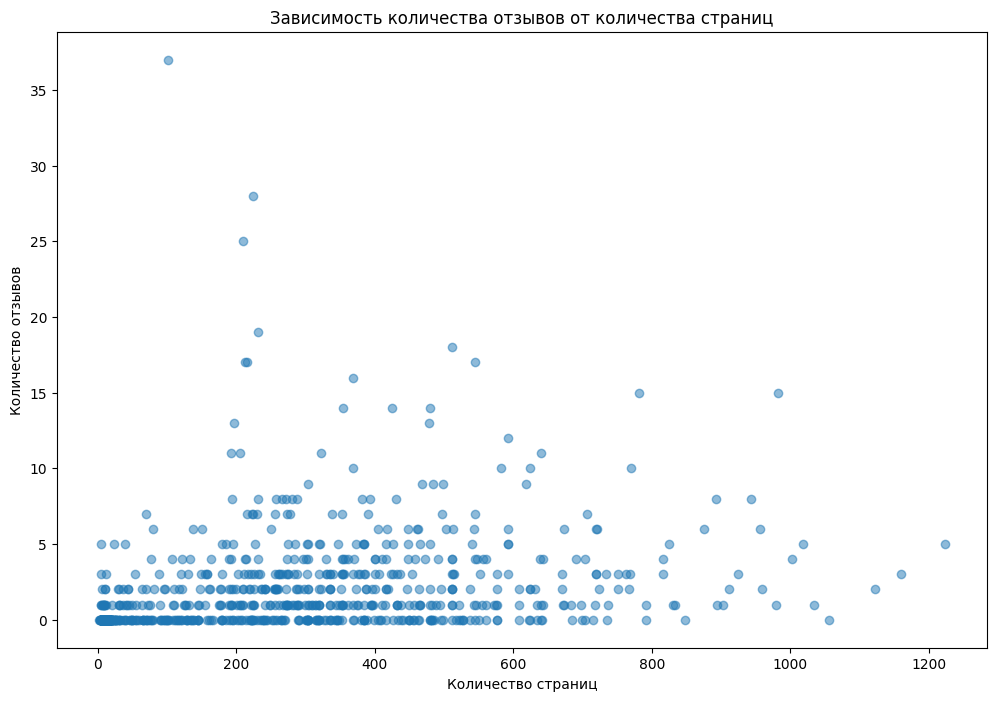

In [21]:
plt.figure(figsize=(12, 8))
plt.scatter(df["pages_count"], df["review_count"], alpha=0.5)
plt.xlabel("Количество страниц")
plt.ylabel("Количество отзывов")
plt.title("Зависимость количества отзывов от количества страниц")
plt.show()

Книги стали выпускаться с 2005 года в основном (когда видимо был расцвет ИТ-книг на русском языке). В целом, он продолжает расти. В 2016 видим сильную просадку.

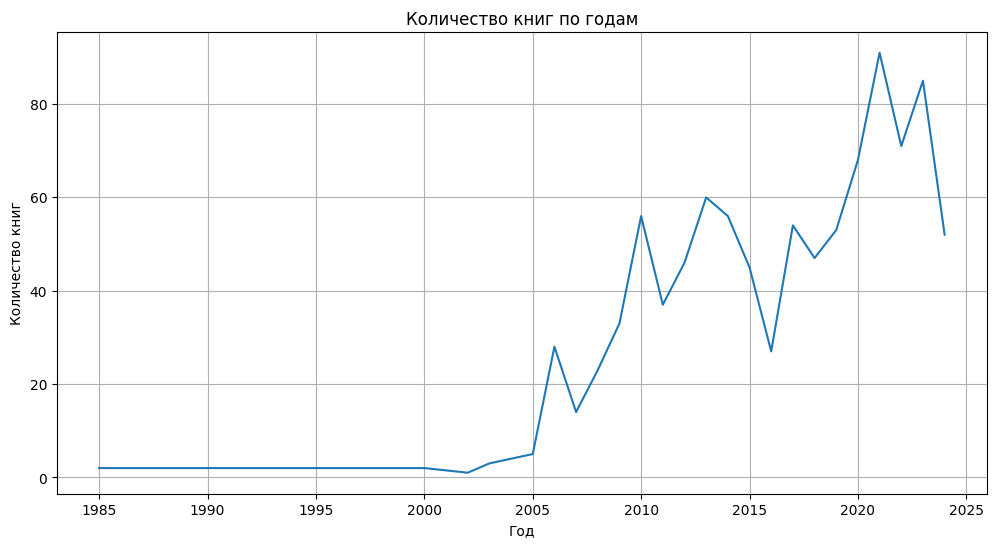

In [22]:
year_counts = df["year"].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(year_counts.index, year_counts.values)
plt.xlabel("Год")
plt.ylabel("Количество книг")
plt.title("Количество книг по годам")
plt.grid()
plt.show()

In [23]:
author_stats = (
    df.groupby("author")
    .agg({"name": "count", "rating": "mean", "review_count": "mean"})
    .rename(columns={"name": "book_count"})
    .reset_index()
)
author_stats.round(2)

,author,book_count,rating,review_count
0,Arsen Gonian,1,5.00,1.0
1,C. И. Никишов,1,4.70,3.0
2,Eugeny Shtoltc,2,2.50,0.0
3,Jade Carter,1,NaN,0.0
4,Nulls,1,4.40,6.0
...,...,...,...,...
725,Ян Пойнтер,1,3.60,2.0
726,а. ф. задорожный,1,NaN,0.0
727,коллектив авторов,5,4.67,0.4
728,м. г. радченко,1,4.00,15.0


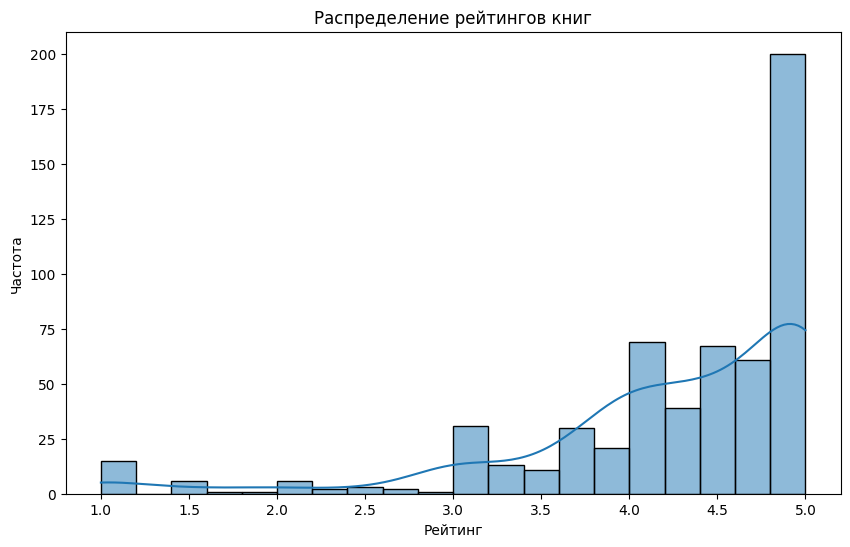

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df["rating"], bins=20, kde=True)
plt.xlabel("Рейтинг")
plt.ylabel("Частота")
plt.title("Распределение рейтингов книг")
plt.show()

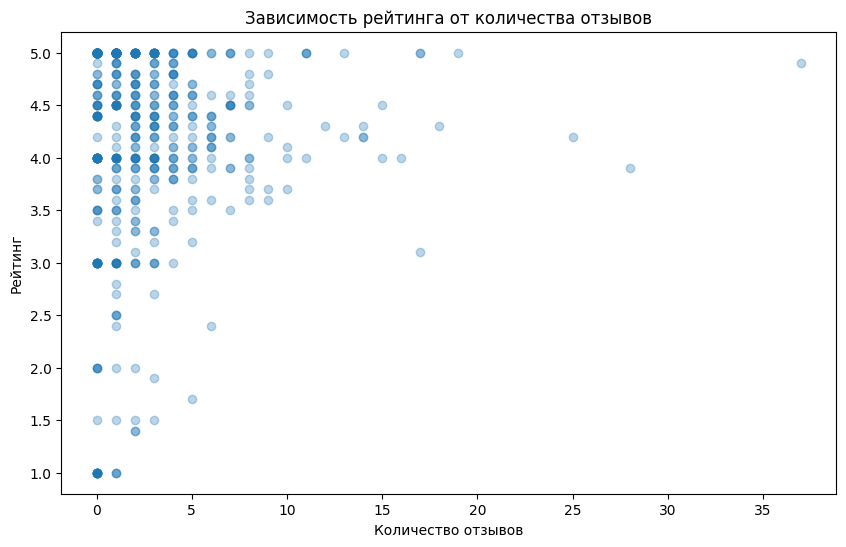

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(df["review_count"], df["rating"], alpha=0.3)
plt.xlabel("Количество отзывов")
plt.ylabel("Рейтинг")
plt.title("Зависимость рейтинга от количества отзывов")
plt.show()